## Домашнее задание 3 
**Выполнили Гайдук Юлия, Панкратова Анна МЖД172**

Задание: Взять коллекцию текстов (не менее 100Кб), построить базовые частотные списки, построить список ключевых слов используя алгоритм RAKE, сравнить полученные результаты.


Работа выполняется на материале произведения Е. И. Рериха ["Мир Огненный"](http://www.lib.ru/RERIH/Rerih_Mir1.txt) объемом 2 Мб

In [152]:
import re
import sys

import pymorphy2
from rake_nltk import Metric, Rake

import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(r'C:\Users\user\AppData\Local\Programs\Python\Python36-32\Lib\site-packages')

Для начала создадим необходимые функции для подготовки текста: удаление пунктуации, лемматизация.

In [141]:
def prepare_text(text):
    # Убирает знаки препинания и символы. 
    text = re.sub(r'[^\w\s]','', text)
    text = re.sub(r'[0-9]+', '', text)
    text = text.replace('\n','')
    text = text.replace('\x14','')
    text = text.replace('\x15','')
    text = text.replace('pp','')
    return text

def normalize_text(text):
    # На вход подаётся подготовленный список слов. Возвращает список лемм.
    morph = pymorphy2.MorphAnalyzer()
    normed_text = []
    for word in text:
        normed_word = morph.parse(word)[0].normal_form
        normed_text.append(normed_word)
    return normed_text

In [142]:
with open("Rerih_Mir.txt") as f:
    text = f.read()
text = prepare_text(text).split()
norm_text = normalize_text(text) # содержит леммы

In [143]:
# загружаем список стоп-слов
with open("ru_stop_words.txt") as f:
    stop_words = f.read()
stop_words = stop_words.split("\n")
stop_words.pop(-1)

''

In [144]:
# очищаем текст от стоп-слов
processed_text = [word for word in norm_text if word not in stop_words]

Создадим функции для подсчёта частот и рангов.

In [145]:
def get_Afreq(text):
    # На вход подаётся список элементов.
    # Возвращает словарь абсолютных частот, где ключами являются элементы, 
    # а значениями — количество появлений элемента в тексте.
    from collections import Counter
    c = Counter()
    for word in text:
        c.update({word:1})
    return dict(c)

In [146]:
def get_Rfreq(text):
    # На вход подаётся список элементов. Возвращает словарь относительных частот,
    # где ключами являются элементы,
    # а значениями — их относительные частоты.
    Afreq_dict = get_Afreq(text)
    Rfreq_dict = {}
    t = len(text)
    for key, value in Afreq_dict.items():
        Rfreq_dict[key] = value/t
    return Rfreq_dict

In [147]:
def get_rank(text):
    # Принимает на вход список элементов. Возвращает словарь рангов,
    # где ключами являются элементы, а значениями — их ранги.
    # Ранг — порядковый номер слова в списке, упорядоченном по убыванию частот
    from operator import itemgetter
    Rank_dict = {}
    Afreq_dict = get_Afreq(text)
    freq_list = sorted(Afreq_dict.items(), key=itemgetter(1), reverse=True)
    for n, tpl in enumerate(freq_list, start=1):
        Rank_dict[tpl[0]] = n
    return Rank_dict

Применим наши функции и посмотрим, что получилось.

Подсчёт частоты лемм. Отсортируем, чтобы увидеть, какие леммы встречаются в тексте чаще всего (топ-20 самых частотных лемм).

In [148]:
from operator import itemgetter
Afreq_text = get_Afreq(processed_text)
Afreq_list_sorted = sorted(Afreq_text.items(), key=itemgetter(-1), reverse=True)
for tpl in Afreq_list_sorted[:20]:
    print("Лемма '{}' встречается в тексте {} раз.".format(tpl[0], tpl[1]))

Лемма 'огненный' встречается в тексте 2168 раз.
Лемма 'мир' встречается в тексте 1705 раз.
Лемма 'нужно' встречается в тексте 1291 раз.
Лемма 'можно' встречается в тексте 1163 раз.
Лемма 'человек' встречается в тексте 1144 раз.
Лемма 'дух' встречается в тексте 980 раз.
Лемма 'такой' встречается в тексте 966 раз.
Лемма 'огонь' встречается в тексте 883 раз.
Лемма 'сердце' встречается в тексте 881 раз.
Лемма 'который' встречается в тексте 881 раз.
Лемма 'каждый' встречается в тексте 826 раз.
Лемма 'энергия' встречается в тексте 813 раз.
Лемма 'когда' встречается в тексте 809 раз.
Лемма 'тонкий' встречается в тексте 747 раз.
Лемма 'самый' встречается в тексте 710 раз.
Лемма 'сознание' встречается в тексте 691 раз.
Лемма 'высокий' встречается в тексте 664 раз.
Лемма 'свой' встречается в тексте 643 раз.
Лемма 'мысль' встречается в тексте 634 раз.
Лемма 'явление' встречается в тексте 614 раз.


Можно предположить, что раз произведение озаглавлено "Мир Огненный", то данному вопросу будет посвящена значительная часть содержания, что и отражается в частотном списке лемм: среди наиболее часто встречающихся лемм мы видим такие элементы как "огненный", "мир", "человек", "дух". Также мы видим наверху частотного списка такие предикативы как "можно" и "нужно", что указывает на обилие в тексте фраз с модальным значением долженствования, необходимости, возможности. Можно предположить, что эти слова являются сказуемыми безличных предложений.

Выведем ранги лемм (выводятся первые 10 элементов). 

In [149]:
Rank_norm_text = get_rank(processed_text) # ранги лемм

In [150]:
Rank_norm_list = []
for word, number in Rank_norm_text.items():
    Rank_norm_list.append((word, number))
for tpl in Rank_norm_list[:10]:
    print("Лемма '{}' имеет ранг {}.".format(tpl[0], tpl[1]))

Лемма 'огненный' имеет ранг 1.
Лемма 'мир' имеет ранг 2.
Лемма 'нужно' имеет ранг 3.
Лемма 'можно' имеет ранг 4.
Лемма 'человек' имеет ранг 5.
Лемма 'дух' имеет ранг 6.
Лемма 'такой' имеет ранг 7.
Лемма 'огонь' имеет ранг 8.
Лемма 'сердце' имеет ранг 9.
Лемма 'который' имеет ранг 10.


Итак, у нас есть частоты и ранги лемм. Теперь можно построить графики зависимости относительной частоты от ранга. 
Для построения графика будет использоваться библиотека matplotlib.

Положим частоты на ось y, а ранги — на ось х. Построим график и посмотрим, что получилось. Мы видим, что частота обратно пропорциональна рангу. Чем выше частота, тем меньше ранг, и наоборот. График иллюстрирует эмпирический закон Ципфа. 

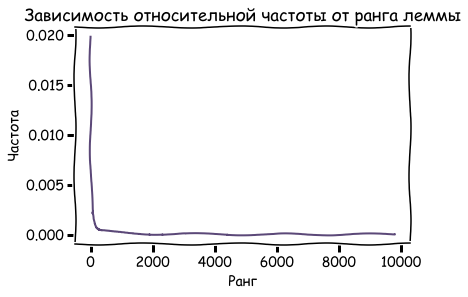

In [151]:
Rfreq_norm_text = get_Rfreq(processed_text)

y = sorted(Rfreq_norm_text.values(), reverse=True) # относительная частота
x = sorted(Rank_norm_text.values()) # ранг

plt.xkcd()
plt.plot(x, y, color='#5b4878')
plt.xlabel('Ранг')
plt.ylabel('Частота')
plt.title('Зависимость относительной частоты от ранга леммы')

Теперь применим алгоритм RAKE. Применим его на лемматизированном и на нелемматизированном текстах, сравним словосочетания длины в 2 и 3 слова. Мы видим, что в составе наиболее часто встречающихся словосочетаний лежат леммы, которые pymorphy2 определил как наиболее частотные.

In [153]:
with open("Rerih_Mir.txt") as f:
    text = f.read()
text = prepare_text(text)

In [159]:
split_text = text.split()
norm_text = normalize_text(split_text)
prep_text = " ".join(norm_text)

In [200]:
# Лемматизированный текст, сортировка по частоте, длина 2
r = Rake(language="russian", stopwords=stop_words, max_length=2, ranking_metric=Metric.WORD_FREQUENCY)
r.extract_keywords_from_text(prep_text)
freq_2 = r.get_ranked_phrases() 
print("Наиболее часто встречающиеся словосочетания длины 2 по лемматизированному тексту:")
for item in freq_2[:10]:
    print(item)

Наиболее часто встречающиеся словосочетания длины 2 по лемматизированному тексту:
огненный дух
дух человек
только человек
огненный сознание
сердце огненный
огненный сердце
сознание человек
огонь дух
огненный мир
мир огненный


In [201]:
# Лемматизированный текст, сортировка по частоте, длина 3
r = Rake(language="russian", stopwords=stop_words, max_length=3, ranking_metric=Metric.WORD_FREQUENCY)
r.extract_keywords_from_text(prep_text)
freq_3 = r.get_ranked_phrases() # Сортировка по частоте, длина 3
print("Наиболее часто встречающиеся словосочетания длины 3 по лемматизированному тексту:")
for item in freq_3[:10]:
    print(item)

Наиболее часто встречающиеся словосочетания длины 3 по лемматизированному тексту:
мир огненный человек
огненный мир нужно
мир огненный нужно
мир огненный можно
мир огненный сердце
энергия огненный мир
огненный мир когда
мир огненный когда
земной мир огненный
мир огненный ибо


In [202]:
# Нелемматизированный текст, сортировка по частоте, длина 2
r = Rake(language="russian", stopwords=stop_words, max_length=2, ranking_metric=Metric.WORD_FREQUENCY)
r.extract_keywords_from_text(text)
freq_2_simple = r.get_ranked_phrases() # Сортировка по частоте, длина 2
print("Наиболее часто встречающиеся словосочетания длины 2 по нелемматизированному тексту:")
for item in freq_2_simple[:10]:
    print(item)

Наиболее часто встречающиеся словосочетания длины 2 по нелемматизированному тексту:
может сердце
будет нужно
только могут
жизни может
сознание может
нужно сердце
можно будет
огонь может
огненного нужно
только тонкого


In [203]:
# Нелемматизированный текст, сортировка по частоте, длина 2
r = Rake(language="russian", stopwords=stop_words, max_length=3, ranking_metric=Metric.WORD_FREQUENCY)
r.extract_keywords_from_text(text)
freq_3_simple = r.get_ranked_phrases() # Сортировка по частоте, длина 3
print("Наиболее часто встречающиеся словосочетания длины 3 по нелемматизированному тексту:")
for item in freq_3_simple[:10]:
    print(item)

Наиболее часто встречающиеся словосочетания длины 3 по нелемматизированному тексту:
нужно строительство можно
может остановиться можно
нужно только вспомнить
только можно надеяться
может уменьшиться только
когда нужно напомнить
только можно усвоить
будет нужно
нужно говорить ибо
нужно растерзание духа


**Выводы**

* Анализ списка частотности лемм показал, что в выбранном произведении в топе списка частот оказались слова, тесно связанные с тематикой произведения (например *огненный*, *человек*, *дух*. Можно предположить, что в текстах узкой направленности или специализированных текстах в списке частотности лемм будут присутствовать слова, связанные с тематикой текста. 

* При построении графиков зависимости частоты от ранга выяснилось, что чем выше частота, тем меньше ранг. Частота обратно пропорциональна рангу и для словоформ, и для лемм, что подтверждает закон Ципфа. 

* Анализ наиболее часто встречающихся словосочетаний показал, что в их основе лежат леммы, выделенные как наиболее частотные на раннем этапе.